In [105]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot  as plt
from mpl_toolkits import mplot3d


p_points = 5
T_points = 10
n_points = 2
p = np.linspace(1e+5, 1.1e+5, p_points)
T = np.linspace(2.5e+3, 5e+3, T_points)
n = np.linspace(0.2, 0.3, n_points)

p_, T_, n_ = np.meshgrid(p, T, n, indexing = 'ij')
print(p_.shape)

data = np.zeros((np.prod(p_.shape), 3))

data[:, 0] = np.ravel(p_)
data[:, 1] = np.ravel(T_)
data[:, 2] = np.ravel(n_)
np.savetxt('input.txt', header = str(np.prod(p_.shape)), X = data, comments='')

(5, 10, 2)


In [111]:
!Проект1.exe

Start test: computation of diffusion coefficients
Loading particles data
Finished loading particles data
Molecule's names: O2
Atom's names: O
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   36
1   

In [107]:
# читаем посчитанные коэффициенты диффузии
nc = 39 # число коэффициентов

coeffs = np.loadtxt('output.txt')

print('coeffs.shape = ', coeffs.shape)
coeffs_3d = np.zeros((nc, p_points, T_points, n_points))

for i in range(nc):
    coeffs_3d[i, :, :, :] = np.reshape(coeffs[:, i], (p_points, T_points, n_points))
print('coeffs_3d.shape = ', coeffs_3d.shape)

coeffs.shape =  (100, 39)
coeffs_3d.shape =  (39, 5, 10, 2)


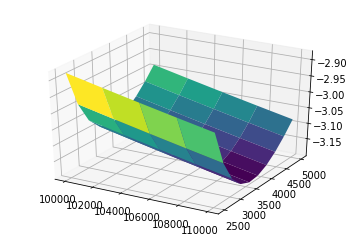

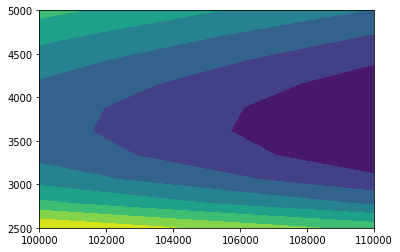

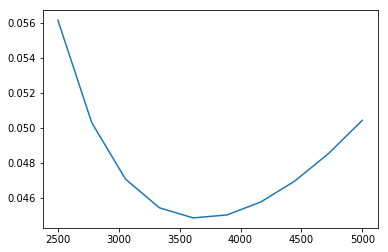

In [112]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ic = 4

k = 0

ax.plot_surface(p_[:, :, k], T_[:, :, k], np.log(coeffs_3d[ic, :, :, k]) ,cmap='viridis', edgecolor='none')

plt.show()

plt.contourf(p_[:, :, k], T_[:, :, k], np.log(coeffs_3d[ic, :, :, k]))
plt.show()
# plt.savefig('surface.png')
plt.plot(T, coeffs_3d[ic, 0, :, k])